In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pwd

/home/luca/Desktop/uni/master/lab/distributed_systems/ds/learner-service/src/notebooks


In [3]:
losses = [
    pd.read_csv("../../predator_losses.txt", header=None),
    pd.read_csv("../../prey_losses.txt", header=None),
]

In [4]:
len(losses[0][0])

26060

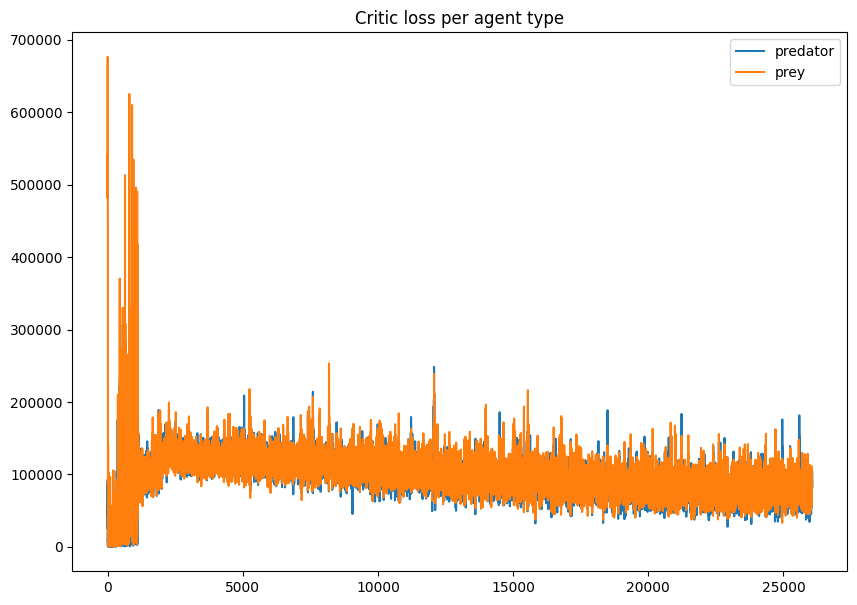

In [5]:
plt.figure(figsize=(10, 7))

for loss in losses:
    means = [subarr for subarr in loss[0]]
    plt.plot(range(len(means)), means)

plt.title("Critic loss per agent type")
plt.legend(["predator", "prey"])
plt.show()

## Use regression model to check if the error tendency is statistically significant

In [25]:
from scipy.stats import linregress

episodes = list(range(len(losses[0])))
error = list(losses[0][0])  # Predator loss
slope, intercept, r_value, p_value, std_err = linregress(episodes, error)

In [26]:
# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

Slope: -1.5878069487413968
Intercept: 117561.39979205426
R-squared: 0.18473929966200597
P-value: 0.0


In [27]:
if p_value < 0.05:
    print("The trend in error reduction is statistically significant.")
else:
    print("The trend in error reduction is not statistically significant.")

The trend in error reduction is statistically significant.


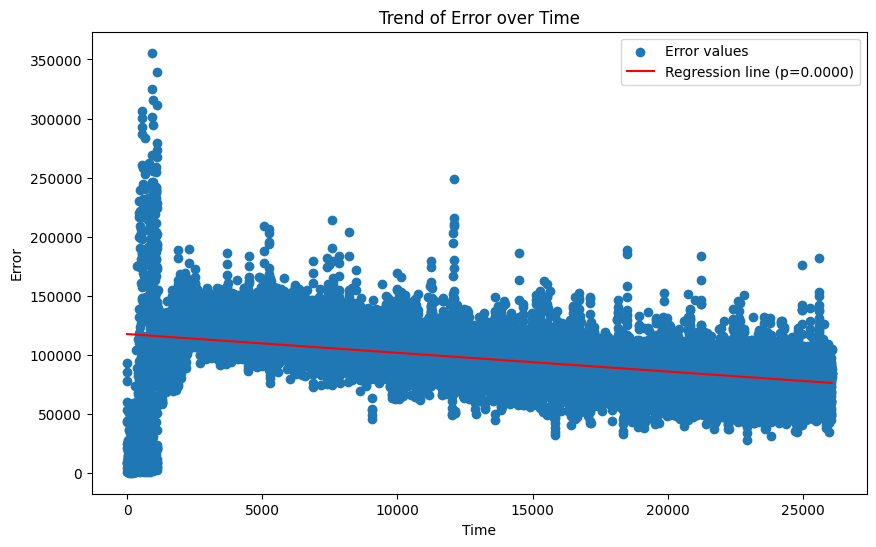

In [30]:
# Plot the data and regression line
episodes = np.array(episodes)

plt.figure(figsize=(10, 6))
plt.scatter(episodes, error, label="Error values")
plt.plot(
    episodes,
    intercept + slope * episodes,
    color="red",
    label=f"Regression line (p={p_value:.4f})",
)
plt.xlabel("Time")
plt.ylabel("Error")
plt.title("Trend of Error over Time")
plt.legend()
plt.show()